In [1]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/bfro_reports.csv')
df

,index,YEAR,SEASON,STATE,COUNTY,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,REPORT_CLASS,LOCATION_DETAILS,MONTH,DATE,A_&_G_References
0,0,2010,Summer,Alabama,Winston County,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,Class B,NaN,NaN,NaN,NaN
1,1,Early 1990's,Fall,Alaska,Valdez-Chitina-Whittier County,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,Class A,East side of Prince William Sound,NaN,NaN,NaN
2,2,1974,Fall,Rhode Island,Washington County,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,Class A,"Great swamp area, Narragansett Indians",September,Sunday,NaN
3,3,72 or 73,Summer,Pennsylvania,York County,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,Class B,I would rather not have exact location (listin...,NaN,NaN,NaN
4,4,1984,Spring,Oregon,Yamhill County,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,Class B,"Logging roads north west of Yamhill, OR, about...",May,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,5480,2005,Summer,New Mexico,Rio Arriba County,dulce nm,(withheld),while camping protecting other equipment befor...,no frist time camping there,"one nephew, my two son where sleeping",local people talk off seeing bigfoot in the ar...,"moon was half full, about 0330 hrs. clear skys...","mountain valley, with ridges and canyons, pine...",11992.0,Class B,(withheld),June,"june 26, 2005",NaN
5481,5481,1976,Spring,Maryland,Prince George's County,NaN,NaN,I was on my way to work on a Saturday morning ...,NaN,I was on my way to work around 7 am on a Satur...,NaN,NaN,there is an undeveloped area of land that stra...,1171.0,Class A,"Laurel, Maryland. It was sighted off of Rt 19...",NaN,NaN,NaN
5482,5482,2011,Summer,Florida,Lake County,Sorrento,Mt.Plymouth rd/St.rt.46,On the twenty sixth and again on the twenty se...,NaN,NaN,close by about 20 or so years ago.also a frien...,between 5:00 and 5:15 am,"some houses, some pine forest, this area lies ...",30267.0,Class A,"head n.on highway 441 from Orlando,then go eas...",July,26,NaN
5483,5483,2015,Fall,Illinois,White County,Norris City,Omitted for privacy reasons,I was hunting on me and my neighbor's property...,Trees big around as pipe pvc snapped in half a...,No I was hunting,No,It was right before morning before you could s...,Covered brush deer trail area,59058.0,Class B,It was on my neighbor's property in the woods ...,November,12,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5485 entries, 0 to 5484
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                5485 non-null   int64  
 1   YEAR                 5020 non-null   object 
 2   SEASON               5021 non-null   object 
 3   STATE                5021 non-null   object 
 4   COUNTY               5021 non-null   object 
 5   NEAREST_TOWN         4699 non-null   object 
 6   NEAREST_ROAD         4321 non-null   object 
 7   OBSERVED             4983 non-null   object 
 8   ALSO_NOTICED         3339 non-null   object 
 9   OTHER_WITNESSES      4551 non-null   object 
 10  OTHER_STORIES        3586 non-null   object 
 11  TIME_AND_CONDITIONS  4539 non-null   object 
 12  ENVIRONMENT          4747 non-null   object 
 13  REPORT_NUMBER        5021 non-null   float64
 14  REPORT_CLASS         5021 non-null   object 
 15  LOCATION_DETAILS     4261 non-null   o

In [4]:
df.dropna(subset=['OBSERVED'], inplace=True)
df.dropna(subset=['REPORT_CLASS'], inplace=True)

In [5]:
label_encoder = LabelEncoder() # used to conver classes to numeric form (class A -> 0, class B -> 1, etc..)
observed = df['OBSERVED']
classes = label_encoder.fit_transform(df['REPORT_CLASS'])

In [6]:
print(df['REPORT_CLASS'])
classes

0       Class B
1       Class A
2       Class A
3       Class B
4       Class B
         ...   
5480    Class B
5481    Class A
5482    Class A
5483    Class B
5484    Class B
Name: REPORT_CLASS, Length: 4983, dtype: object


array([1, 0, 0, ..., 0, 1, 1])

In [7]:
obs_train, obs_test, class_train, class_test = train_test_split(observed, classes, test_size=0.3, random_state=42)

In [8]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(obs_train)
X_test = vectorizer.transform(obs_test)

In [9]:
model = xgb.XGBClassifier(n_jobs=-1)
model.fit(X_train, class_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [10]:
predictions = model.predict(X_test)

In [11]:
accuracy = accuracy_score(class_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.06%


In [12]:
good_obs = "Well, lemme set the scene fer ya. It was gettin' close to dusk, and the sun was sinkin' low, castin' long shadows through them tall trees. Them woods was thick with foliage, makin' it hard to see much beyond a few feet ahead. I was out there, deep in the heart of the forest, surrounded by the chirpin' of crickets and the rustlin' of leaves in the breeze. The air was thick with the smell of pine and earth, and every now and then, I'd catch a whiff of somethin' foul—like a skunk done gone and sprayed itself. And then, outta nowhere, I seen it—this big, hairy beast, standin' there in a clearin', lookin' like it done stepped right outta one of them tall tales Granny used to tell. It was like somethin' outta a nightmare, but there it was, real as day, makin' me question everythin' I thought I knew about them woods."
bad_obs = "All I could hear was WHOOP WHOOP WHOOP WHOOP it was scary"
X_obs = vectorizer.transform([good_obs, bad_obs])
my_class = model.predict(X_obs)
print(label_encoder.inverse_transform(my_class))

['Class A' 'Class B']


In [13]:
print(my_class)

[0 1]


In [14]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [64]:
def create_word_cloud(text_data, image_mask_array, cloud_img_name):
    plt.axis("off")
    obs_wc = WordCloud(mask=image_mask_array, contour_color='#964B00', contour_width=.1).generate(f'{text_data}')
    plt.imshow(obs_wc)
    plt.savefig(f'wordclouds/{cloud_img_name}.jpg')

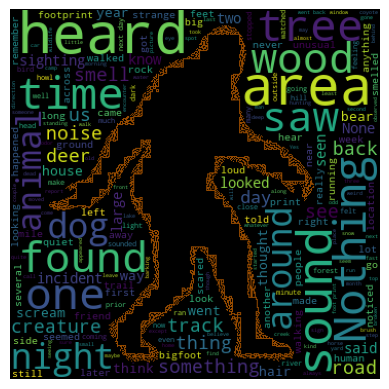

In [65]:
text1 = ' '.join(df.dropna(subset=['ALSO_NOTICED'])['ALSO_NOTICED'])
text2 = ' '.join(df.dropna(subset=['OTHER_WITNESSES'])['OTHER_WITNESSES'])
text3 = ' '.join(df.dropna(subset=['OTHER_STORIES'])['OTHER_STORIES'])
text4 = ' '.join(df.dropna(subset=['ENVIRONMENT'])['ENVIRONMENT'])
observed_text = ' '.join(observed)

create_word_cloud(text_data=text1, image_mask_array=np.invert(np.asarray(Image.open('bigfoot.jpg'))), cloud_img_name='ALSO NOTICED')

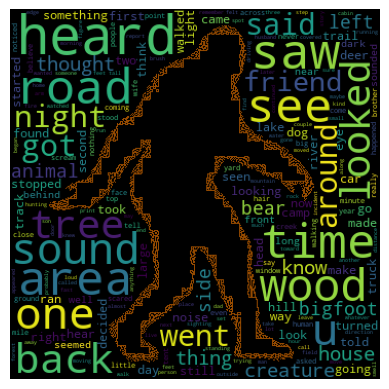

In [66]:
create_word_cloud(text_data=observed_text, image_mask_array=np.invert(np.asarray(Image.open('bigfoot.jpg'))), cloud_img_name='OBSERVED')

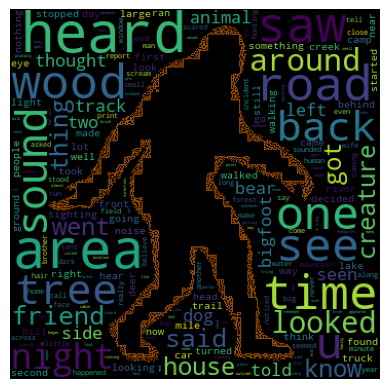

In [68]:
create_word_cloud(text_data=f'{observed_text} {text1} {text2} {text3} {text4}', image_mask_array=np.invert(np.asarray(Image.open('bigfoot.jpg'))), cloud_img_name='FINAL')